<a href="https://colab.research.google.com/github/AikaHorizon333/EelEQ/blob/master/Exam_2_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exam AC - First Order Butterworth Filet**

 Analysis should be done:
1. Calculation of voltages and currents for all elements (any suitable method could be used);
2. Simulation of circuit with LTspice;
3. Verification of Tellegen’s theorem;
4. Comparison of theoretical and simulation results;
5. Description of practical usage of circuit and practical example.


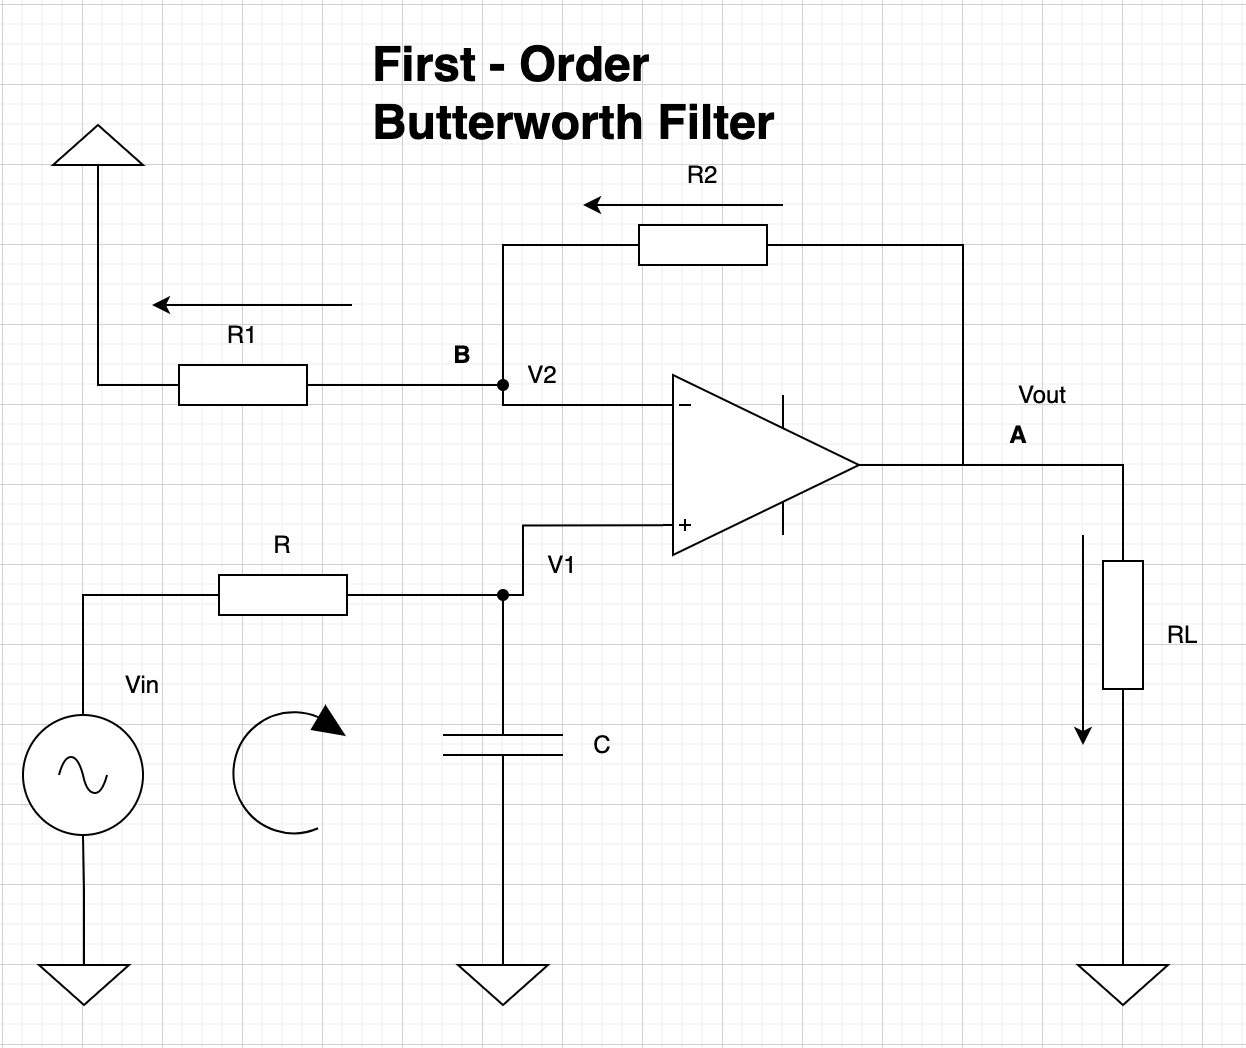

## **The RC Circuit and the Non Inverting Op. Amp**

The circuit is composed by two parts: a RC Circuit and n Op.Amp in Non Linear configuration. 

The whole circuit is known as the First-Order Butterworth Filter. 

One of the properties of a filter is that the output voltage is dependant on the frequency of the signal at the input.

Therefore, one way to analyse the Filter its necessary to find its transference function dependant of the frequency

These two sections can be analyzed as two different entities. 

To ease calculations and a better understanding the RC circuit will be calculated using the Sinusoidal Steady State. This will allow to calculate the properties using Phasors.

For the Op.Amp the following considerations are going to be taken into account.

* $V_1 = V_2$

* No current flows into the Op.Amp


## **Analysis of RC Loop**

The impedance of the Resistor and the Capacitor is

$Z_R = R$

$Z_C = \frac{1}{j ω C}$


The elements are configured in Series, therefore the equivalent Impedance of the RC loop may be writen as: 

$Z_{eq} = Z_R + Z_C$


Also, it's important to reacall that the angular frecuency $ω$ is expressed as

$ω = 2 \pi f$

Aditionally, filters have a constant known as the Cut-off frequency. This constant allows to stablish a boundary between the frequencies that the filter will let pass and the ones that will reject.

$f_c = \frac{1}{2 \pi R C}$


Analyzing the circuit reveals that $V_1$ may be calculated as a Voltage Divisor of $V_{in}$


$V_1 = \frac{Z_C}{Z_R + Z_C}V_{in}$


By replacing $Z_c$ and $Z_R$ the expresion aquires the following shape


$V_1 = \frac{1}{j ω C} \frac{1}{R + \frac{1}{j ω C}} V_{in}$




By Performing the multipliction between the terms 


$V_1 = \frac{1}{jωCR+1}V_{in}$


After replacing the angular frequency and grouping terms


$V_1 = \frac{1}{j \frac{f}{f_c} + 1} V_{in}$

Dividing the input of the Op. Amp $V_1$ by $V_{in}$

$\frac{V_1}{V_{in}} = \frac{1}{j \frac{f}{f_c} + 1}$


The expresion above relates the "Output" of the filter section with the Input of the amplifier. Since its a complex quantity is important to know how it will affect the input by magnitude and angle



The magnitude of the relationship may found by dividing the magnitude of the two phasors this is done by $|z| = \sqrt{a^2 + b^2}$

$\frac{|V_{1}|}{|V_{in}|} = \frac{1}{\sqrt{1 + (\frac{f}{f_c})^2}} = K$



The angle of the phase may be also obtained in function of the frequency by

$θ_k = -\arctan{\frac{f}{fc}}$


### **Filter Simulation - Input Section**

Initial Conditions

* Frequency Hz test 1000
* Input Voltage 1 V
* Phase 0 °



In [16]:
import math
import cmath
import numpy as np


# Defining Initial Conditions

f = 1000           # Frequency Hz test 1000
w = 2*math.pi*f     # Angular Frequency Rad
V_in_mag = 1        # Input Voltage 1 V
V_in_ph = 0         # Input Voltage 1 V
V_in = cmath.rect(V_in_mag, V_in_ph)

print("\n Initial conditions: ")
print(f"Frequency = {f} Hz ")
print(f"Angular Frequency = {w} rad ")
print(f"Input Voltage = {abs(V_in)} V ")
print(f"Phase = {np.angle(V_in)} rad ")

print("\n Filter Characteristics: ")

# Elements

R = 10*10**3              # R Ohms
C = 10**-8                # C Farads
f_c = 1/(2*math.pi*R*C)   # f_c Hz
f_r = f/f_c
print(f"R = {R} Ohm")  
print(f"C = {C} F")
print(f"Cut off Frequency: {f_c} Hz")
print(f"Frequency Ratio = {f_r}")


# Impedances

Z_C = complex(0,(-1/w*C))
Z_R= complex(R,0)
Z_eq = Z_C + Z_R

print(f"Z C = {Z_C} Ohm")
print(f"Z R = {Z_R} Ohm")
print(f"Equivalent Impedance = {Z_eq} Ohm")


# Voltage Divisor K using freq

K_mag  = 1/math.sqrt(1 + math.pow(f_r,2))
K_theta = math.atan(-f_r)
K = cmath.rect(K_mag, K_theta)

print("\n Transfer Parameter: ")
print(f"K = {K}")
print(f"K Magnitude = {K_mag}")
print(f"K Phase Shift = {K_theta}")


# Voltage Across Filter Resistor

V_1 = K_mag*V_in_mag
V_R = math.sqrt(pow(V_in_mag,2) + pow(V_1,2) - 2*math.cos(V_in_ph-K_theta)*V_1*V_in_mag )
V_C = V_1

I_R = V_R/R
I_C = I_R

print("\n Voltage And Currents Through Filter Loop: ")


print(f"V_R = {V_R} V")
print(f"V_C = {V_C} V")

print(f"I_R = {I_R} A")
print(f"I_C = {I_R} A")





 Initial conditions: 
Frequency = 1000 Hz 
Angular Frequency = 6283.185307179586 rad 
Input Voltage = 1.0 V 
Phase = 0.0 rad 

 Filter Characteristics: 
R = 10000 Ohm
C = 1e-08 F
Cut off Frequency: 1591.5494309189535 Hz
Frequency Ratio = 0.6283185307179586
Z C = -1.5915494309189536e-12j Ohm
Z R = (10000+0j) Ohm
Equivalent Impedance = (10000-1.5915494309189536e-12j) Ohm

 Transfer Parameter: 
K = (0.7169568003248977-0.4504772433683886j)
K Magnitude = 0.8467330159648304
K Phase Shift = -0.5609821161086238

 Voltage And Currents Through Filter Loop: 
V_R = 0.532018044501408 V
V_C = 0.8467330159648304 V
I_R = 5.32018044501408e-05 A
I_C = 5.32018044501408e-05 A


## **Analysis of Op.Amp**

For the Op.Amp Analysis we known that 

$V_2 = V_1$

Since no current flows into the Op.Amp The current through the Feedback Loop $I_F$ may calculated by Analysing $R_1$

If we follow the current flow using KCL from the Op.Amp output node to the reference node we Find that 

$I_{F} = I_{R_1} = I_{R_2}$

The current may calculated using Ohm's Law using voltage through $R_1$, that is equivalent to $V_1$

$I_{R_1} = \frac{V_2 - 0}{R_1}$

$I_{R_1} = \frac{V_1}{R_1}$

Therefore, the feedback current may writen as dependant from the Voltage input Frequency:

$I_{F} = \frac{K V_{in}}{R_1}$

Additionally, the current flowing through the Load may be found by 

$I_L = \frac{Vout}{R_L}$


### **How to Analyse the Op.Amp Gain?**

There is a Loop that is form between GND-A ; A-B; B-GND, this loop can be analyzed using KVL. 

We know that from GND-A the voltage value is $V_{out}$, since its the ouput of the Op.Amp. Then, from A-B the Voltage drops across the resistor $R_2$ by $V_{R2}$, then from B-GND the voltage drops once more across the resistor $R_1$ by $V_{R_1}$ And becomes zero since we are at GND level. So the KVL for that loop is

$V_{out} - V_{R_2} - V_{R_1} = 0$

Using Ohm's Law and the feedback current

$V_{out} - I_{F}R_{2} - I_{F}R_{1} = 0$

$V_{out} - \frac{V_1}{R_1}R_{2} - \frac{V_1}{R_1}R_{1} = 0$

By grouping terms and dividing the entire expresion by $V_1$, the equation becomes the Gain of the Op.Amp

$\frac{V_{out}}{V_1} = A_o=  1 + \frac{R_2}{R_1}$


## **Joining Vin to Vout**


Now, there are two equations that relate the filter input to the output.



* $\frac{|V_{1}|}{|V_{in}|} = K = \frac{1}{\sqrt{1 + (\frac{f}{f_c})^2}}$

* $\frac{V_{out}}{V_1} = A_o=  1 + \frac{R_2}{R_1}$

Then, the voltage output in function of the input frequency is

* $V_{out} = A_{o} K V_{in}$

* $V_{out} = \frac{1 + \frac{R_2}{R_1}}{\sqrt{1 + (\frac{f}{f_c})^2}} V_{in}$


Since this is a Non Inferting Amp the phase shift of $V_{out}$ is $θ$ calculated previously



### **Filter Simulation - Output Section**

Op Amp Resistors

* R1 =  1 kOhm
* R2 = 1 kOhm
* Test Load = 10kOhm


In [20]:
from re import I
# Op. Amp Resistors

R_1 = 1000
R_2 = 1000
R_L = 10000

A_o = 1 + (R_2/R_1)

print("\n Op Amp parameters: ")

print(f"R_1 = {R_1} Ohm")
print(f"R_2 = {R_2} Ohm")
print(f"Gain: {A_o}")


I_F = K_mag * V_in_mag/R_1
I_1 = I_F
I_2 = I_F

V_R_1 = I_F * R_1
V_R_2 = I_F * R_2

print("\n Op Amp Voltages And Currents: ")
print(f"V_R_1 = {V_R_1} V")
print(f"V_R_2 = {V_R_2} V")
print(f"I_1 = {I_1} A")
print(f"I_2 = {I_2} A")


V_out_mag = (A_o*K_mag)*V_in_mag
V_out_phase = 0 + K_theta
V_out = cmath.rect(V_out_mag, V_out_phase)

I_Load = V_out_mag/R_L
I_total = I_F + I_Load
I_t_phase = 0 + K_theta

print("\n Output Characteristics: ")


print(f"Output Voltage = {V_out_mag} V")
print(f"Phase = {V_out_phase} rad; {V_out_phase * 180/math.pi} °")
print(f"V_out =  {V_out}")

print(f"I_total: {I_total} A")
print(f"I_total_phase: {I_t_phase * 180/math.pi} °")


print(f"I_Load: {I_Load} A")
print(f"I_Load_Phase: {I_t_phase} rad")




 Op Amp parameters: 
R_1 = 1000 Ohm
R_2 = 1000 Ohm
Gain: 2.0

 Op Amp Voltages And Currents: 
V_R_1 = 0.8467330159648304 V
V_R_2 = 0.8467330159648304 V
I_1 = 0.0008467330159648304 A
I_2 = 0.0008467330159648304 A

 Output Characteristics: 
Output Voltage = 1.6934660319296608 V
Phase = -0.5609821161086238 rad; -32.14190763534206 °
V_out =  (1.4339136006497955-0.9009544867367772j)
I_total: 0.0010160796191577965 A
I_total_phase: -32.14190763534206 °
I_Load: 0.00016934660319296608 A
I_Load_Phase: -0.5609821161086238 rad


In [25]:
# Power Loss
print("\n Power Consumption Active: ")

# Real Power
# Op Amp Feedback Loop and Loss and Gain

# Losses in Op Amp
P_F = (R_1 + R_2)*math.pow(I_F,2)
P_L = R_L * math.pow(I_Load,2)


print(f"Power Loss in Feedback Loop = {P_F} W")
print(f"Power Loss in Load = {P_L} W")

Real_power = P_F + P_L 
print(f"Real power = {Real_power} W")


# Power Sources
P_op = V_out_mag * (I_total)


print(f"Power Supply Op. Amp: {P_op} W")
print(f"Real power Source: {P_op} W")

Tellegen = (P_op) - Real_power 
print(f"Tellegen Problem: {Tellegen} W")





 Power Consumption: 
Power Loss in Feedback Loop = 0.0014339136006497953 W
Power Loss in Load = 0.0002867827201299591 W
Real power = 0.0017206963207797544 W
Power Supply Op. Amp: 0.0017206963207797546 W
Real power Source: 0.0017206963207797546 W
Tellegen Problem: 2.168404344971009e-19 W


In [39]:
print(f"Voltage across the branch = {V_in} V")
print(f"Branch Impedance = {Z_eq} Ohm")

Current  = V_in/Z_eq 
print(f"Current trough Filter Branch = {Current} A")

Current_conj = Current.conjugate() 

print(f"Current Conjugate = {Current_conj} A")

S_p = V_in*Current_conj   

print(f"Complex Power from branch = {S_p}[W, VAr]")



E = V_in

print(f"Emision Source = {E} V")


S_s = E * Current_conj

print(f"Power Supply = {S_s}[W, VAr]")

Balance = S_s - S_p

print(f"Power Balance = {Balance}[W, VAr]")







Voltage across the branch = (1+0j) V
Branch Impedance = (10000-1.5915494309189536e-12j) Ohm
Current trough Filter Branch = (0.0001+1.5915494309189535e-20j) A
Current Conjugate = (0.0001-1.5915494309189535e-20j) A
Complex Power from branch = (0.0001-1.5915494309189535e-20j)[W, VAr]
Emision Source = (1+0j) V
Power Supply = (0.0001-1.5915494309189535e-20j)[W, VAr]
Power Balance = 0j[W, VAr]


## **LTSpice Simulation**

For the LTSPice Simulation a power supply of 9 V was choosen to power the Filter

Initial Conditions are: 

$R_1$ = 1 kOhm

$R_2$ = 1 kOhm

$R$ = 10 kOhm

$C$ = 0.01 uF

Input Voltage = 1 V 

Frequency = 1kHz

Choosen analisys: 5ms transient analysis


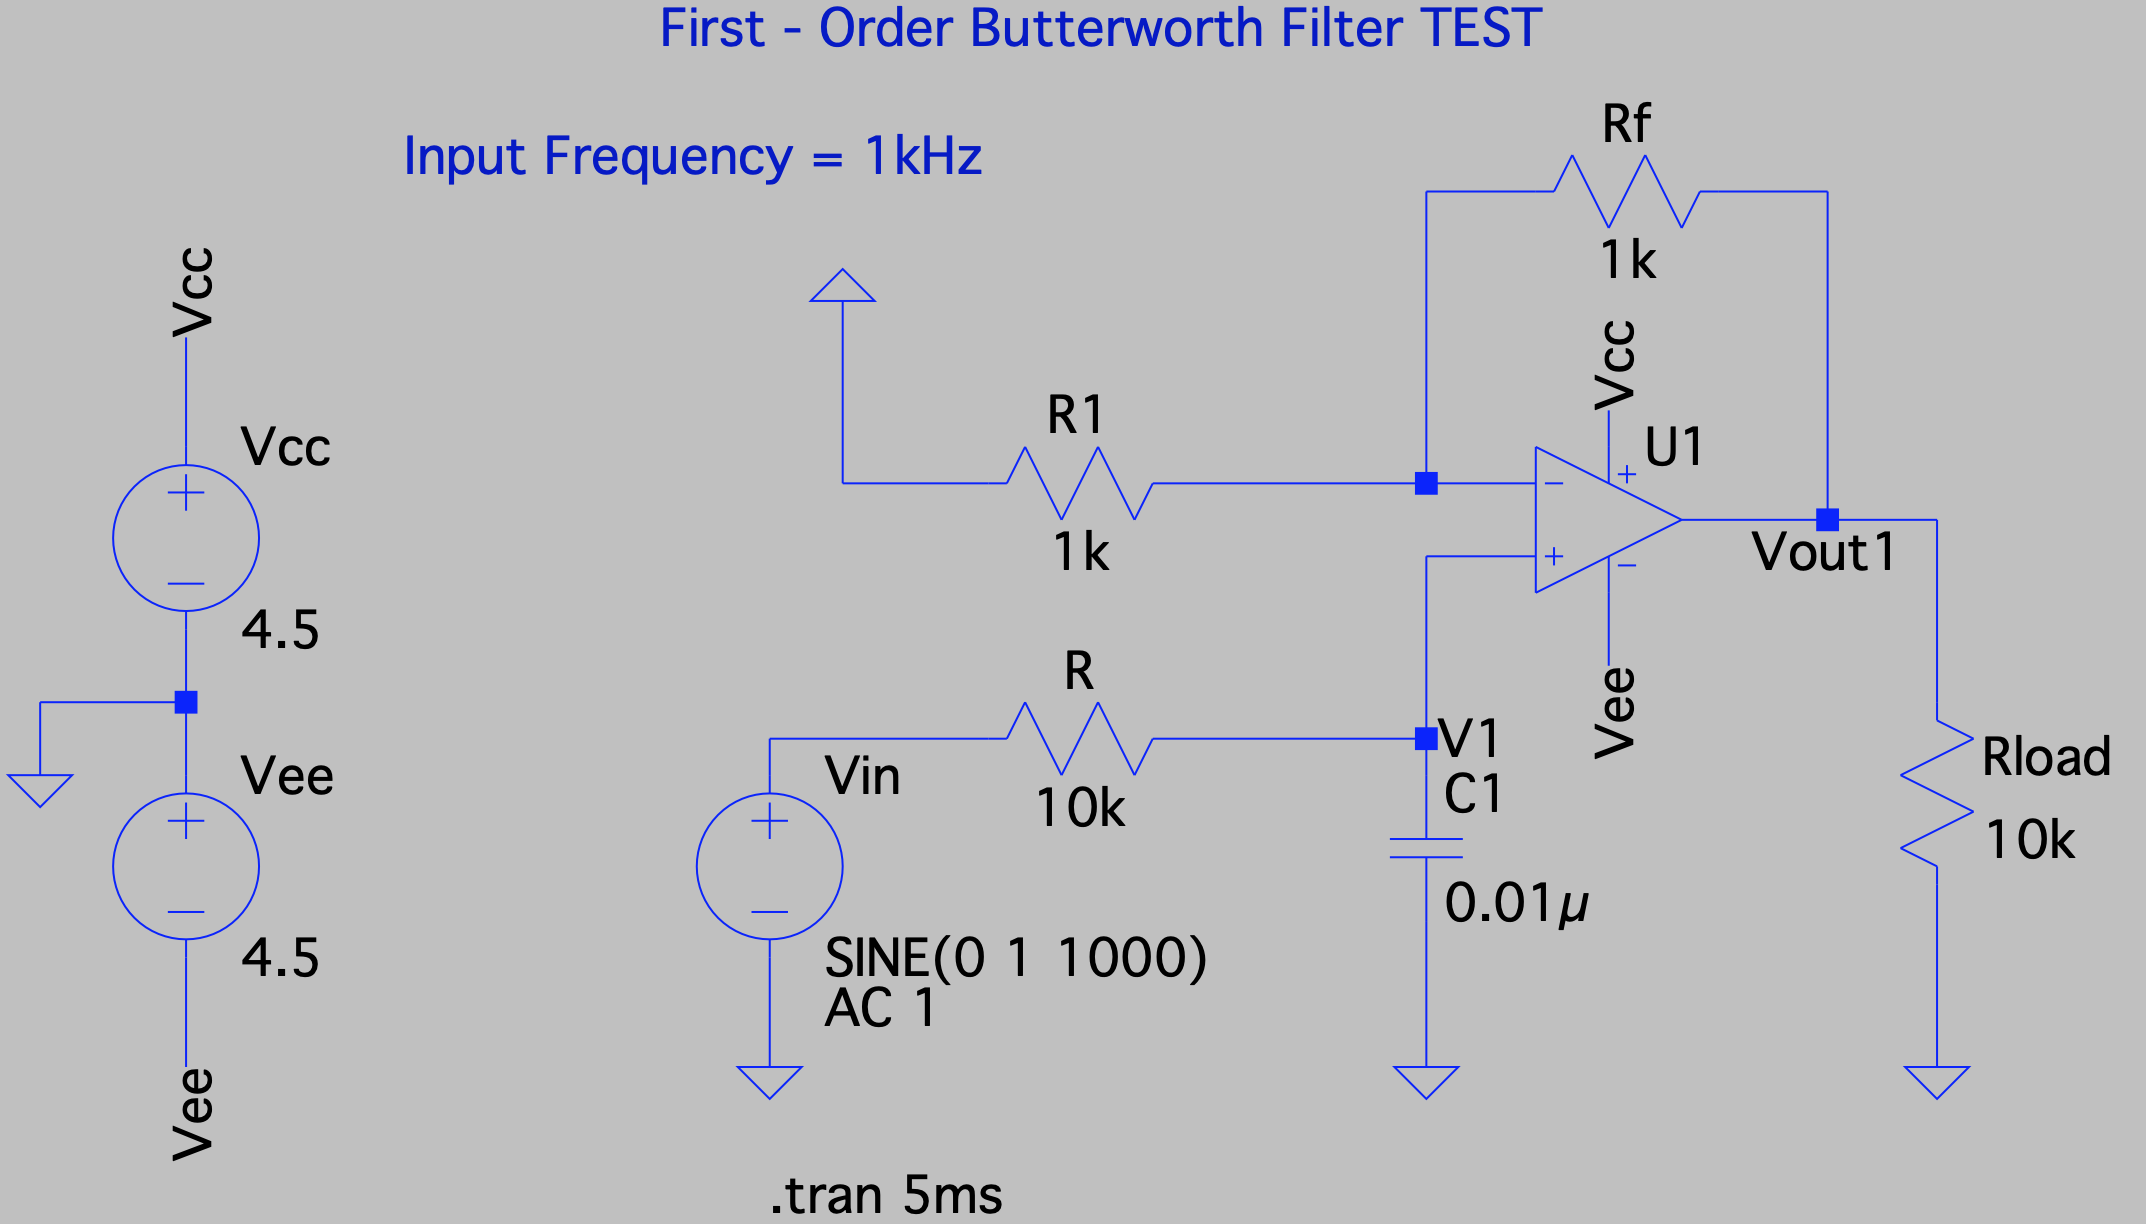

### **LTSpice Simulation - Results**

The Results provided by the transient analysis of LTSpice are the following
```
  Vin = 1 V
  Vout = 1.6923 V
  Phase Shift = -88.44 us -> -31.834°

  V_R = 531.76536mV
  I_R = 53.191403µA

  V_C = 845.66953mV
  I_C = 53.191403µA


  V1 = 845.94248mV
  V2 = 845.94248mV

  V_R_2 = 846.15749mV
  V_R_1 = 846.4188mV
  V_R_L = 1.6906405V

  I_R_2 = 846.42052µA
  I_R_1 = 846.42052µA
  I_R_L = 169.28394µA

```

### **Input And Output Voltages**

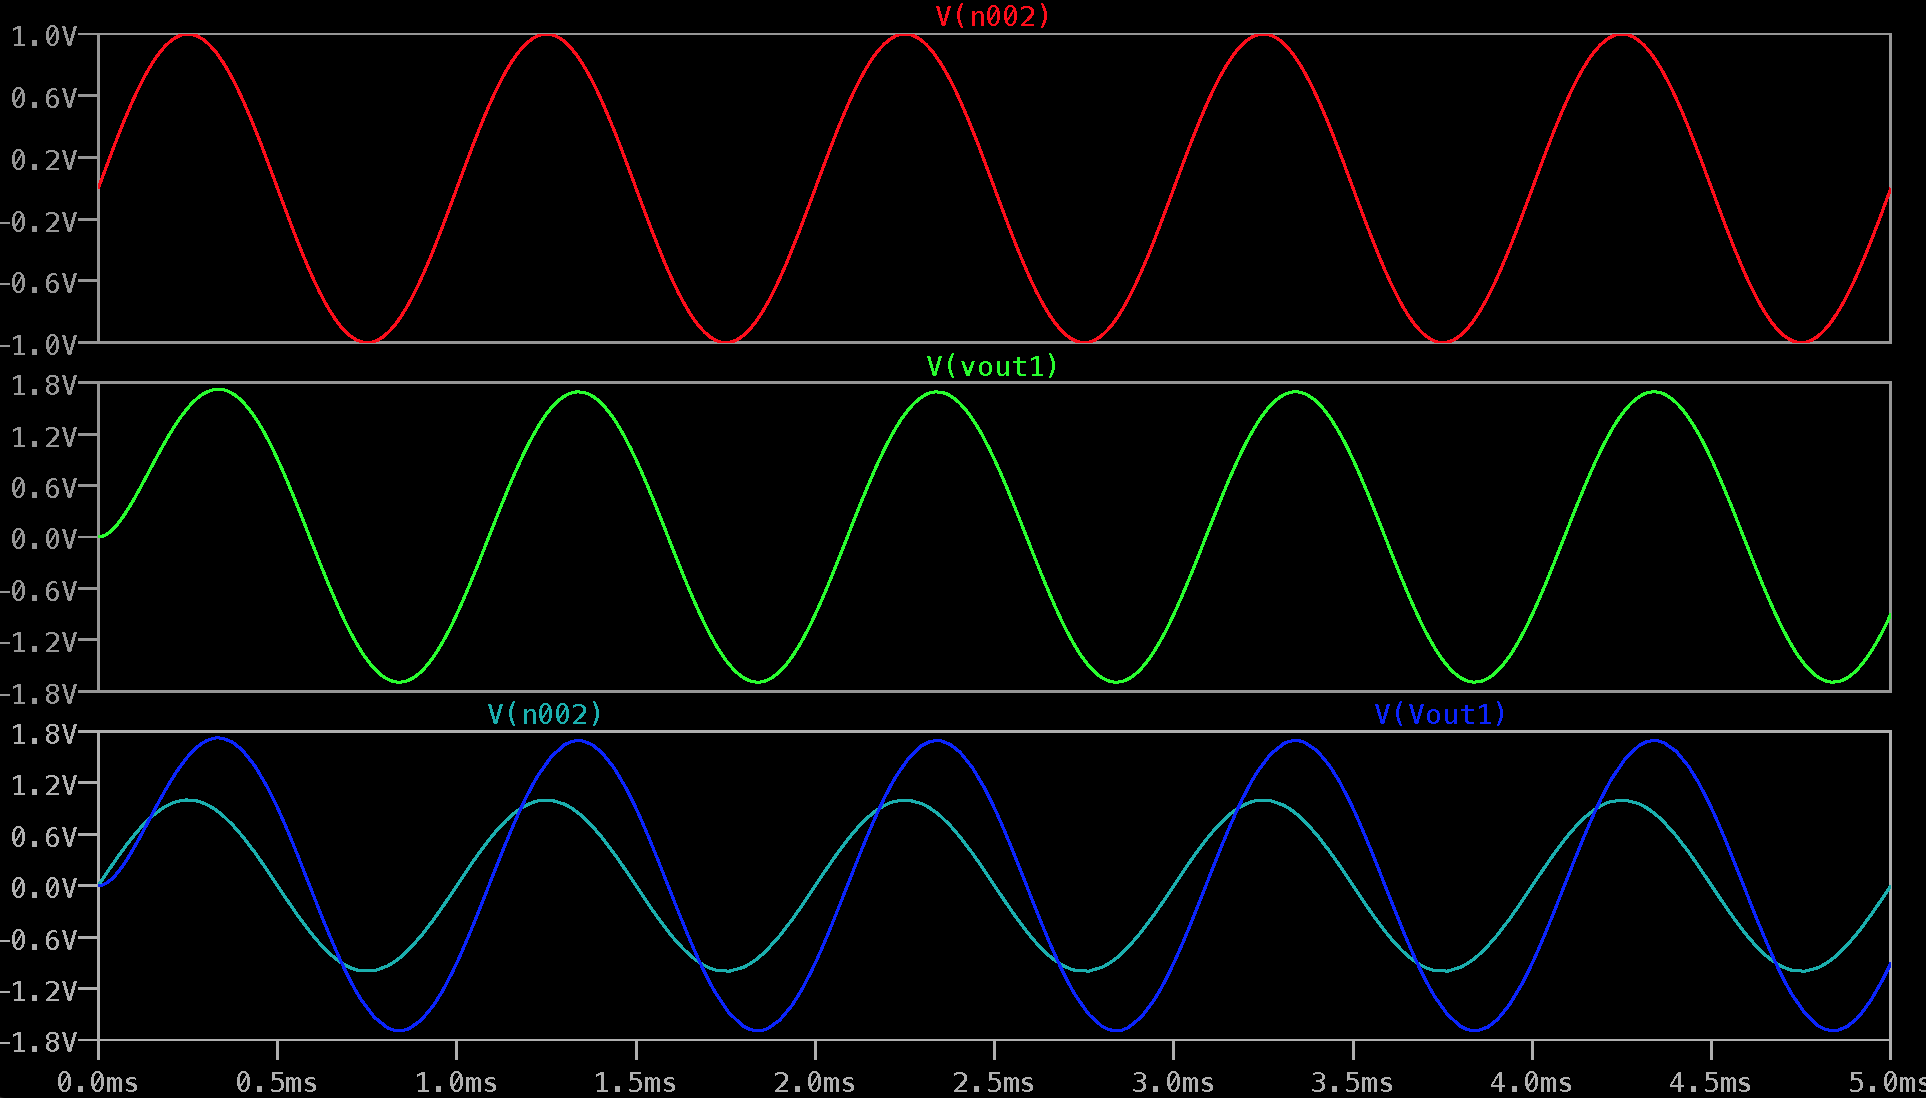

### **Voltages Across Filter Branch**

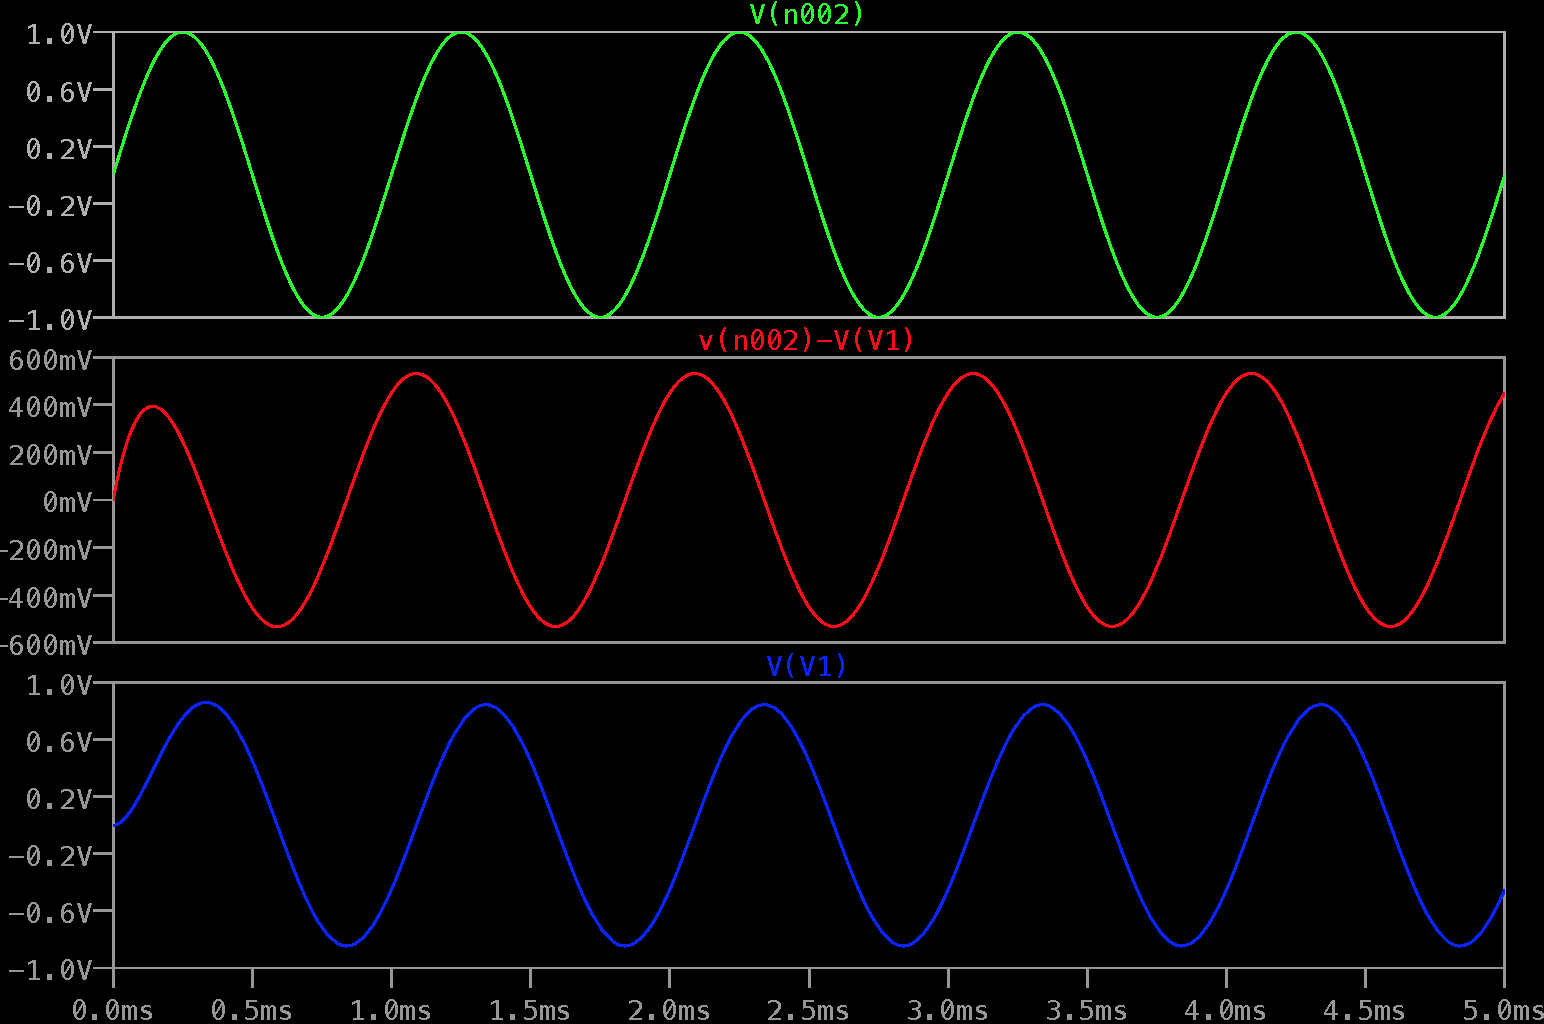

### **Currents In Filter Branch**

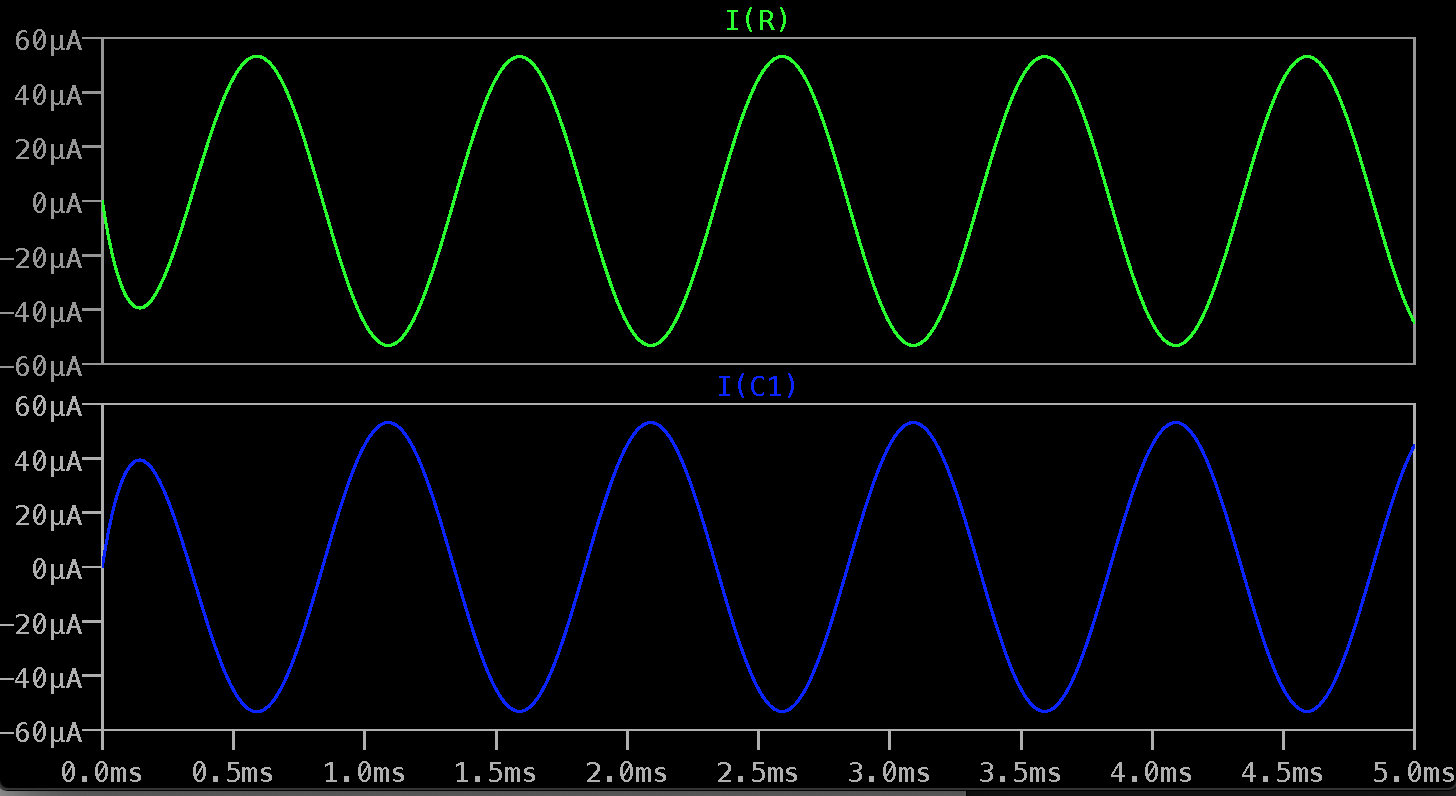

### **Voltages Through Feedback Loop**

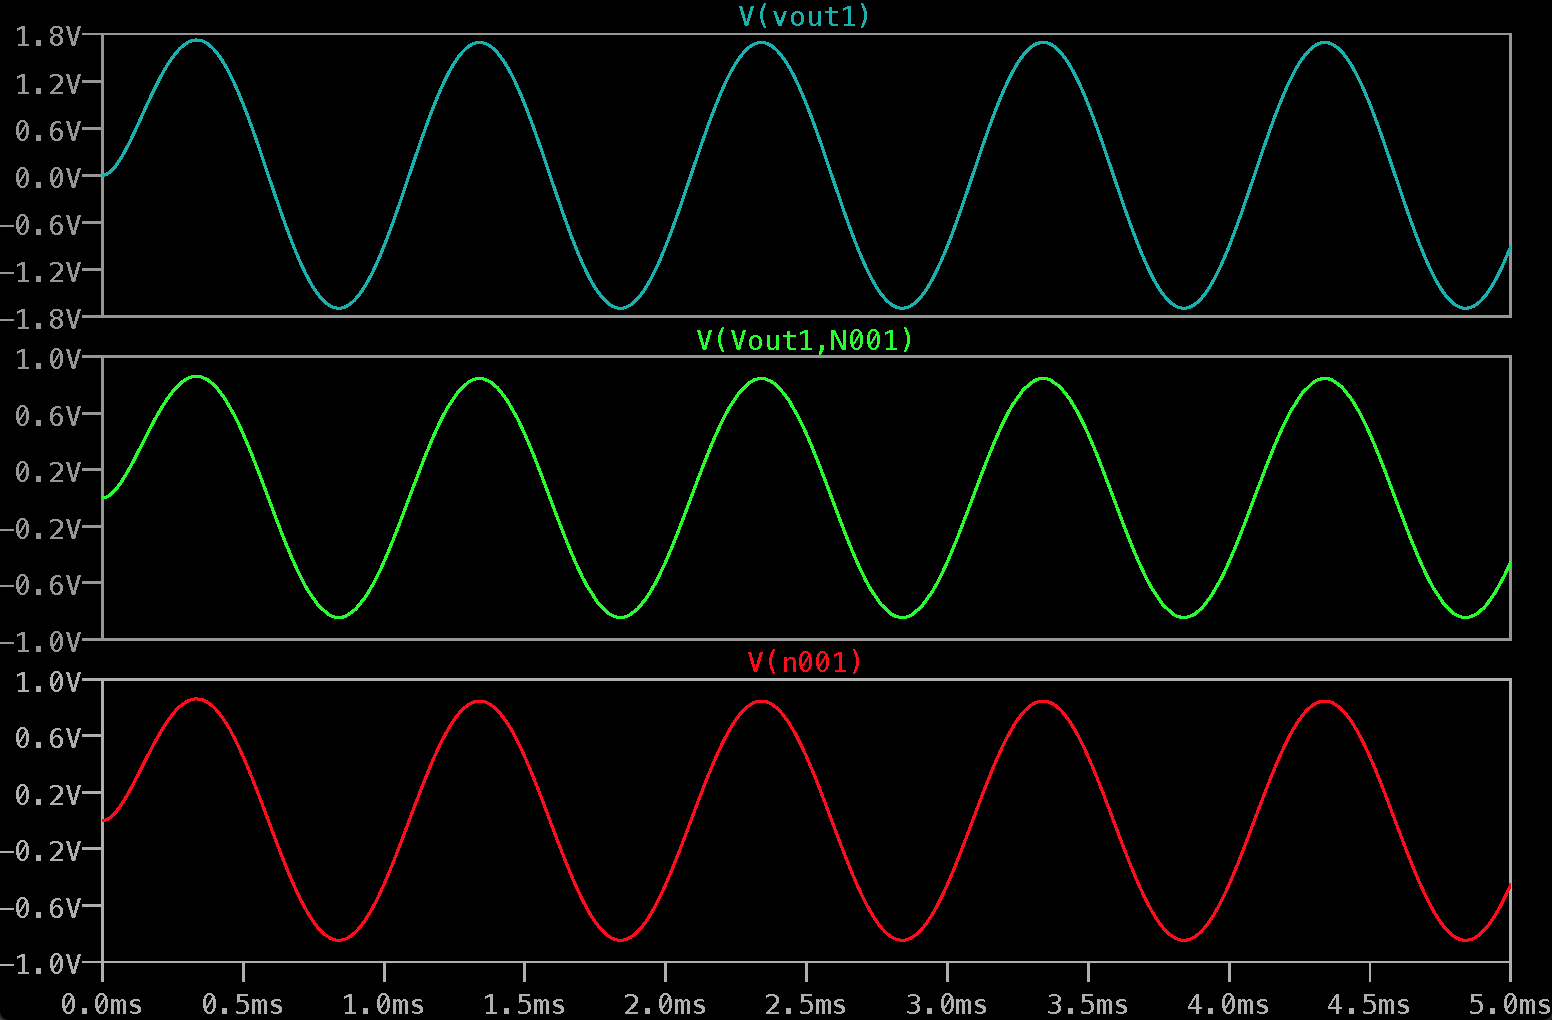

### **Current Across Feedback Loop**

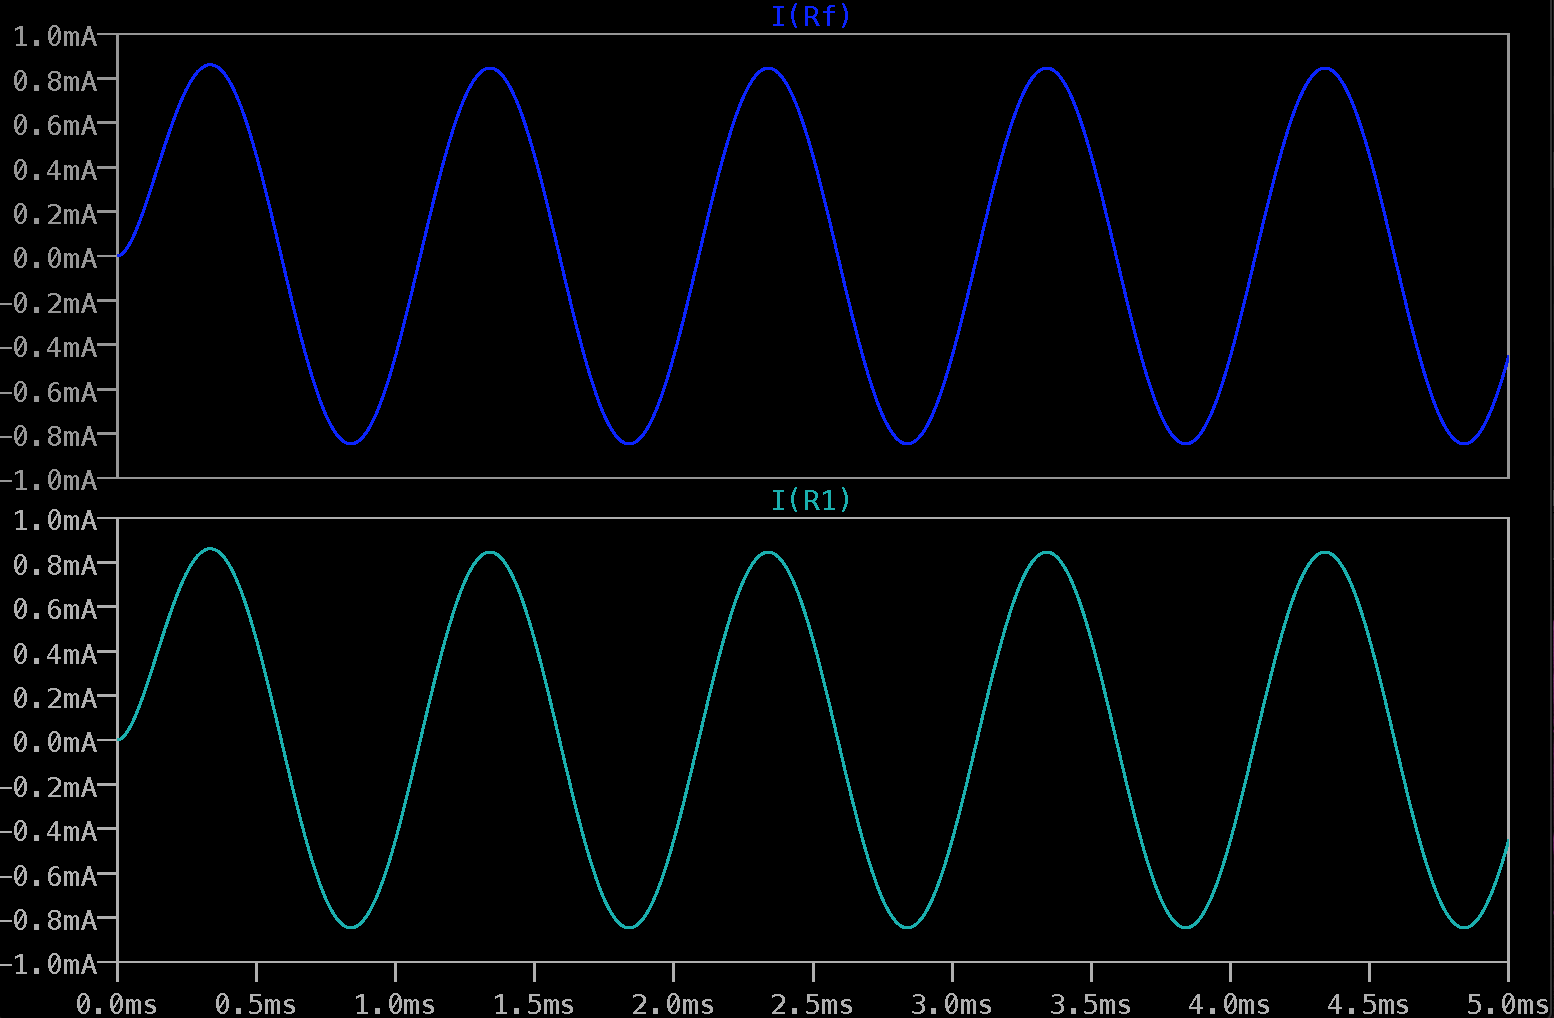



### **Current From Op.Amp and Current Through Load**

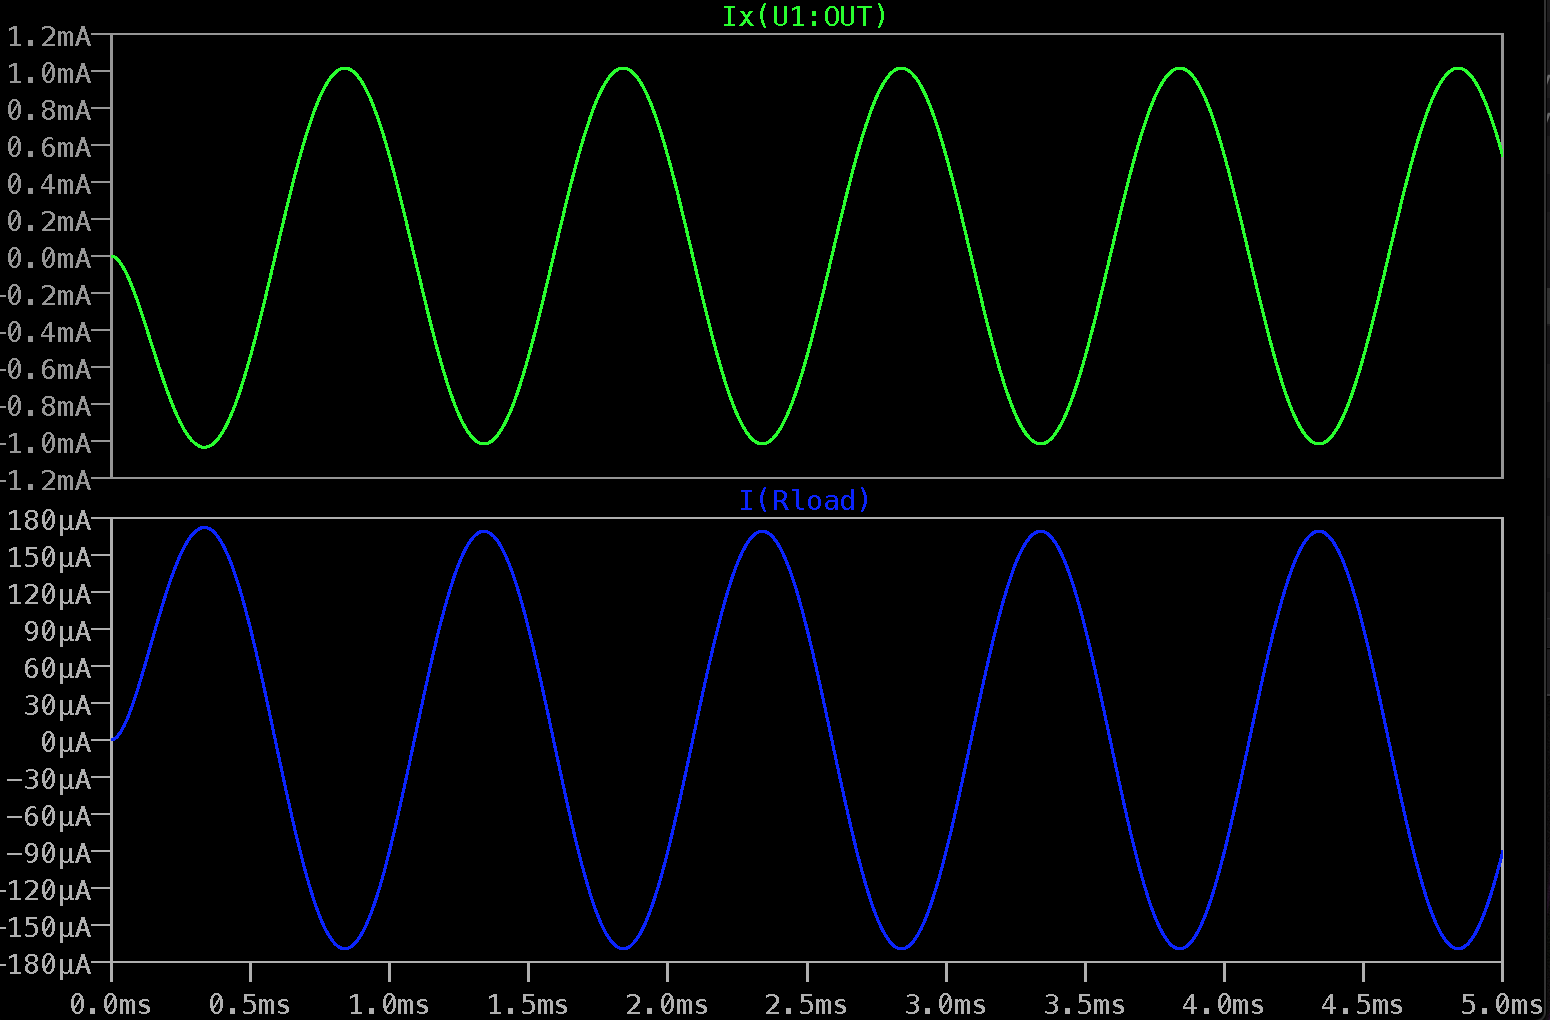


##  **Theorical Values Vs LTSpice Simulation**

The expressions that allowed the calculation of the theorical values followed a set of considerations of an Ideal Amplifier, these considerations were:
* No current flows into the amplifier 
* The voltage between the two inputs is zero.

In practice this is achived due the high impedance at the input of the amplifier; since there is no infinite impedance in the real world there is still a small current flowing into the amplifier and making the voltage between the two inputs its not zero but close to zero. 

This two factors are taken into account in the simulation software to get more realistic results. For LTSpice the input impedance is 500 MOhm.

With all said the theorical calculations and the software symulations are really close and almost it is possible that are the same values. 

A test signal of frequency 1kHz and 1 Volt was used to perform the calculations 


For the Input side of the Circuit the obtained values are: 

```

  // Input Theorical Values
    
    Voltage And Currents Through Filter Loop: 
    
    V_R = 0.532018044501408 V   
    I_R = 5.32018044501408e-05 A

    V_C = 0.8467330159648304 V
    I_C = 5.32018044501408e-05 A

  // Input Simulation Values

    V_R = 531.76536mV
    I_R = 53.191403µA

    V_C = 845.66953mV
    I_C = 53.191403µA


```

For the Feedback Branch of the Op.amp the obtained values are: 

```

  // FeedBack Branch Theorical Values
    
    Op Amp Voltages And Currents: 
    
    V_R_1 = 0.8467330159648304 V
    V_R_2 = 0.8467330159648304 V
    
    I_1 = 0.0008467330159648304 A
    I_2 = 0.0008467330159648304 A


  // FeedBack Branch Simulation Values

    V_R_2 = 846.15749mV
    V_R_1 = 846.4188mV
  
    I_R_2 = 846.42052µA
    I_R_1 = 846.42052µA



```

For the Output of the circuit the obtained values are: 

```

  // Output Theorical Values
    
    Output Characteristics: 
    
    Output Voltage = 1.6934660319296608 V
    Phase = -0.5609821161086238 rad; -32.14190763534206 °
    
    I_total: 0.0010160796191577965 A
    I_total_phase: -32.14190763534206 °

    I_Load: 0.00016934660319296608 A
    I_Load_Phase: -0.5609821161086238 rad

  // Output Simulation Values

    Vout = 1.6923 V
    Phase Shift = -88.44 us -> -31.834°

    V_R_L = 1.6906405V
    I_R_L = 169.28394µA

```

For the test frecuency the output voltage is 1.69 V and it has a -32° phase shift with the input this means that the output signal is delayed. 

The delay is produced by the nature of the capacitor. This property of the capacitor stands that Voltage cannot change abruptly from one instant to another. The capacitor will hold the Voltage producing a phase shift.


Other analysis made was proving the Tellegen Theorem over the circuit. The Tellegen Theorem stands that the sum of all the power supplyed and lost in the circuit must be 0. 


The calculation was made by thinking the circuit as two independent circuits, the input and the output. 

The Op.Amp was modeled as a Voltage source for the output circuit and since the output circuit is built with active components it is possible to perform the calculations as an DC circuit

This will lead to know that the difference betwen the Power supplied by the amp and the power dissipied by the resistors is close to zero.

```
  Power Consumption: 

    Power Loss in Feedback Loop = 0.0014339136006497953 W
    Power Loss in Load = 0.0002867827201299591 W
    
    Real power = 0.0017206963207797544 W
    
    Power Supply Op. Amp: 0.0017206963207797546 W
    Real power Source: 0.0017206963207797546 W
    
    Tellegen Problem: 2.168404344971009e-19 W


```

On the other hand, the input circuit has active and reactive elements but it can be modeled as one element connected to a source. This approach simplifies the problem.

The complex power lost by the branch is 0.0001 W -1.5915494309189535e-20jVAr

The complex power supplied by the source is 0.0001-1.5915494309189535e-20j


This means that the power supplied is the one being lost

Therefore the Tellegen's theorem also holds for the Input circuit and for the entire circuit as all.


```

  // Complex Power

    Voltage across the branch = (1+0j) V
    Branch Impedance = (10000-1.5915494309189536e-12j) Ohm
    Current trough Filter Branch = (0.0001+1.5915494309189535e-20j) A

    Current Conjugate = (0.0001-1.5915494309189535e-20j) A

    Complex Power from branch = (0.0001-1.5915494309189535e-20j)[W, VAr]
    
    
    Emision Source = (1+0j) V
    Power Supply = (0.0001-1.5915494309189535e-20j)[W, VAr]
    
    
    Power Balance = 0j[W, VAr]

```

### **Frequency Response**

How the Output Voltage changes with the frequency? 

By varying the input frequency the following Output Voltages are obtained 

```
  Frequency    Output Voltage    Phase Shift
  200 Hz    1.9843932307871832 V   -7.162455806725821°
  400 Hz    1.9396776630253683 V   -14.107802371590125°
  600 Hz    1.8714304405574103 V   -20.655997382339656°
  800 Hz    1.7869527375880956 V   -26.686610102215308°
  1000 Hz    1.6934660319296608 V   -32.14190763534206° # Test Frequency
  1200 Hz    1.5969423101994973 V   -37.015644573182065°
  1400 Hz    1.5016906885721182 V   -41.33634263114562°
  1600 Hz    1.4104640703262579 V   -45.151707132165285°
  1800 Hz    1.3247936430670795 V   -48.517074789249264°
  2000 Hz    1.2453539845989998 V   -51.48811274603342°
```

As the frequency increases the Output Voltage decreases.

For frequencies lower than 600 Hz the Output voltage is around to the 2 V but as the value increases the Output will decrease. For the Cut-Off Frequency this decreament is -3dB (Before the amplification process). For a higher order filter the decreament will be more pronunced.

In addition to the Voltage Decrement, the phase difference will increase as the frequency increases for the Cut Off frequency the phase shift is 45°. 

The behaviour of this filter is known as a  Low Pass Filter.

If the Output Voltage data is plotted the graph obtained will be the frequency response. The frequency response will be obtained from 20 Hz to 30 kHz.







## **Theorical Frequency Response**

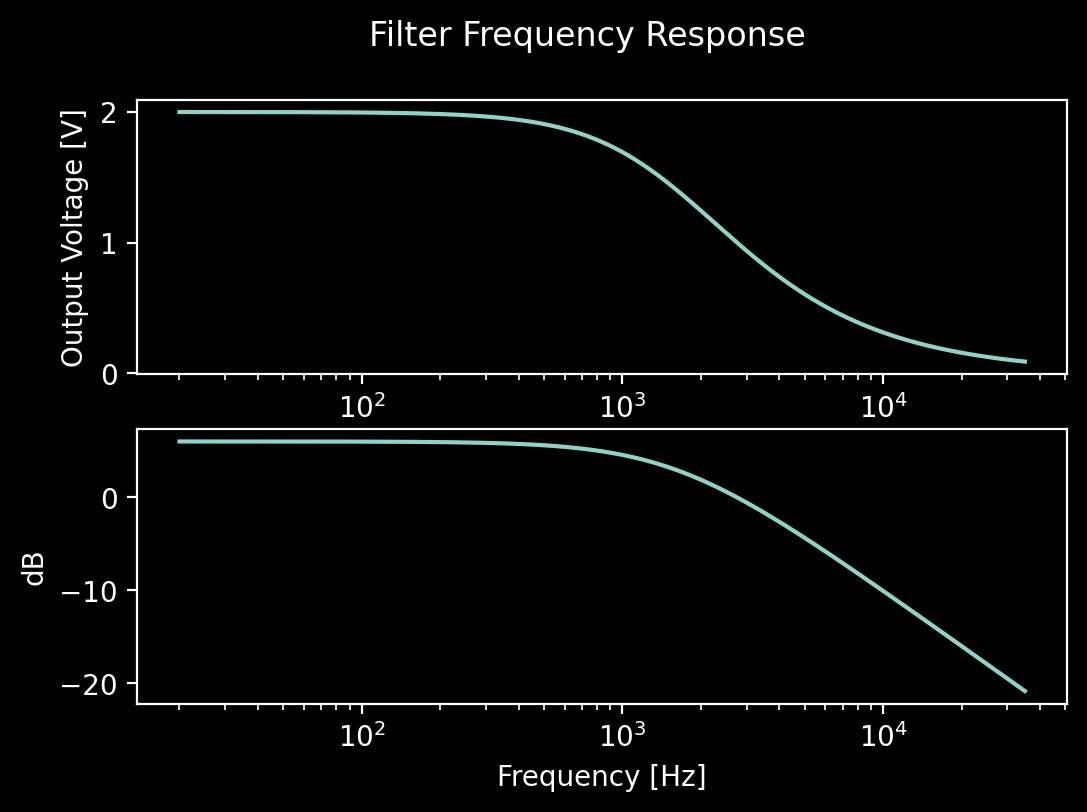

In [92]:
# Filter Function

def MyFilter(freq = 1000, V = 1, Ax = 2):
  '''
    Calculates Output voltage magnitude for a specific frequency

    Components of the filter:

    R = 10kOhm
    C = 0.01uF
    Ax = 2

  '''
  Rx  = 10000 
  Cx  = 10**-8    
  f_cx = 1/(2*math.pi*Rx*Cx)   
  fratio = freq/f_cx

  Ax = 2

  K_magx  = 1/math.sqrt(1 + math.pow(fratio,2))
  K_thetax = math.atan(-fratio)
  Kx = cmath.rect(K_mag, K_theta)

  Voutx = Ax*K_magx*V
  return Voutx

In [110]:
def phase(freq):
  '''
    Calculates Phase Shift for a specific frequency

    Components of the filter:

    R = 10kOhm
    C = 0.01uF
    Ax = 2

  '''
  Rx  = 10000 
  Cx  = 10**-8    
  f_cx = 1/(2*math.pi*Rx*Cx)   
  fratio = freq/f_cx
  K_thetax = math.atan(-fratio)
  return K_thetax*(180/math.pi)


In [50]:
import math

# Decibel Function

def fundB(V2, Vref = 1):
  return 20*math.log10(V2/Vref)

In [100]:
# Function Testing
test  = MyFilter(1000)
print(test)
testdb = fundB(test)
print(testdb)

1.6934660319296608
4.575529797074337


In [111]:
harmonics = np.arange(1,11,1)
print("Frequency    Output Voltage    Phase Shift")
for harmonic in harmonics:
  print(f'{200*harmonic} Hz    {MyFilter(200*harmonic)} V   {phase(200*harmonic)}°')


Frequency    Output Voltage    Phase Shift
200 Hz    1.9843932307871832 V   -7.162455806725821°
400 Hz    1.9396776630253683 V   -14.107802371590125°
600 Hz    1.8714304405574103 V   -20.655997382339656°
800 Hz    1.7869527375880956 V   -26.686610102215308°
1000 Hz    1.6934660319296608 V   -32.14190763534206°
1200 Hz    1.5969423101994973 V   -37.015644573182065°
1400 Hz    1.5016906885721182 V   -41.33634263114562°
1600 Hz    1.4104640703262579 V   -45.151707132165285°
1800 Hz    1.3247936430670795 V   -48.517074789249264°
2000 Hz    1.2453539845989998 V   -51.48811274603342°


In [101]:
# Frequency Response
import numpy as np

# Frequencies from 20Hz up to 35kHz
X_freq = np.arange(20,35005,5)

# Container for Output Signal in V
Y_out = []
# Container for Output Signal in dB
Y_dB = []

print('Number of Frequencies : %7d'%(len(X_freq)))
print('Maximum Frequency : %7d'%(np.max(X_freq)))


Number of Frequencies :    6997
Maximum Frequency :   35000


In [102]:
# Sweep


for f in X_freq:
  Y_out.append(MyFilter(f))
  Y_dB.append(fundB(MyFilter(f)))
  

print('Number of Frequencies Analyzed : %7d, %7d'%(len(Y_out),len(Y_dB)))



Number of Frequencies Analyzed :    6997,    6997


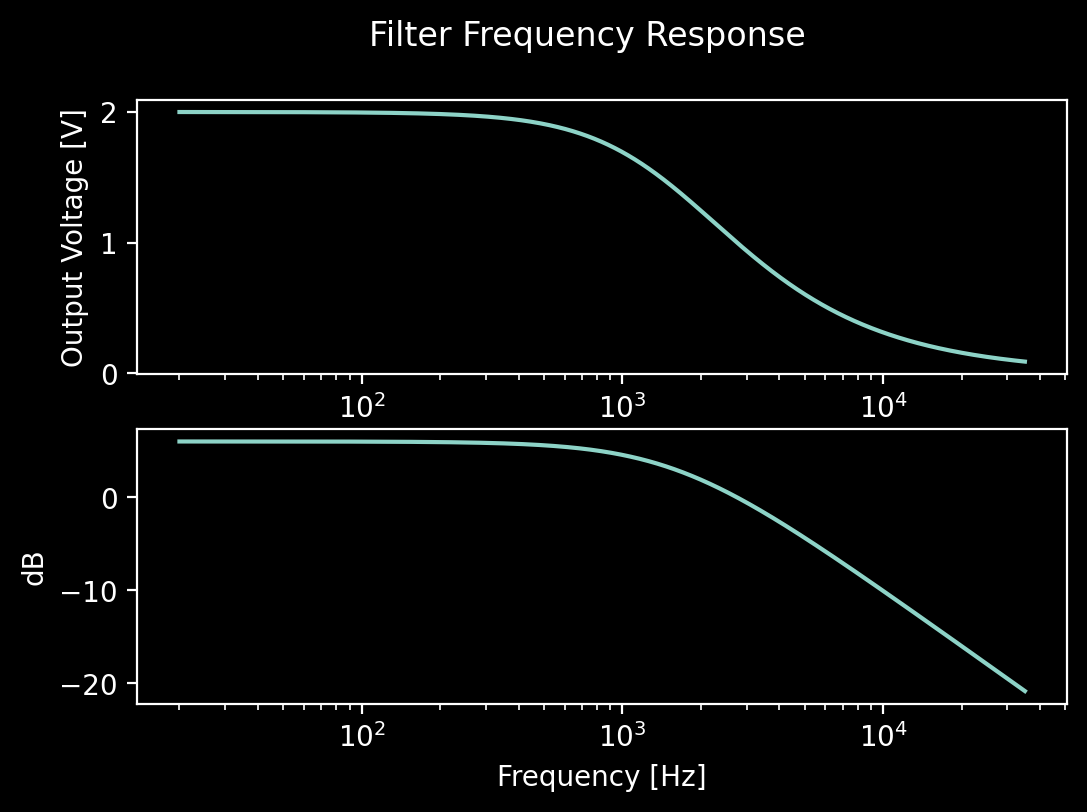

In [94]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')


fig, (ax0, ax1) = plt.subplots(2,1)
fig.set_dpi(200)
fig.suptitle('Filter Frequency Response')

ax0.plot(X_freq, Y_out)
ax0.set_xscale('log')
ax0.set_xlabel('Frequency [Hz]')
ax0.set_ylabel('Output Voltage [V]')

ax1.plot(X_freq, Y_dB)
ax1.set_xscale('log')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('dB')


plt.show()

## **LTSpice Frequency Response**





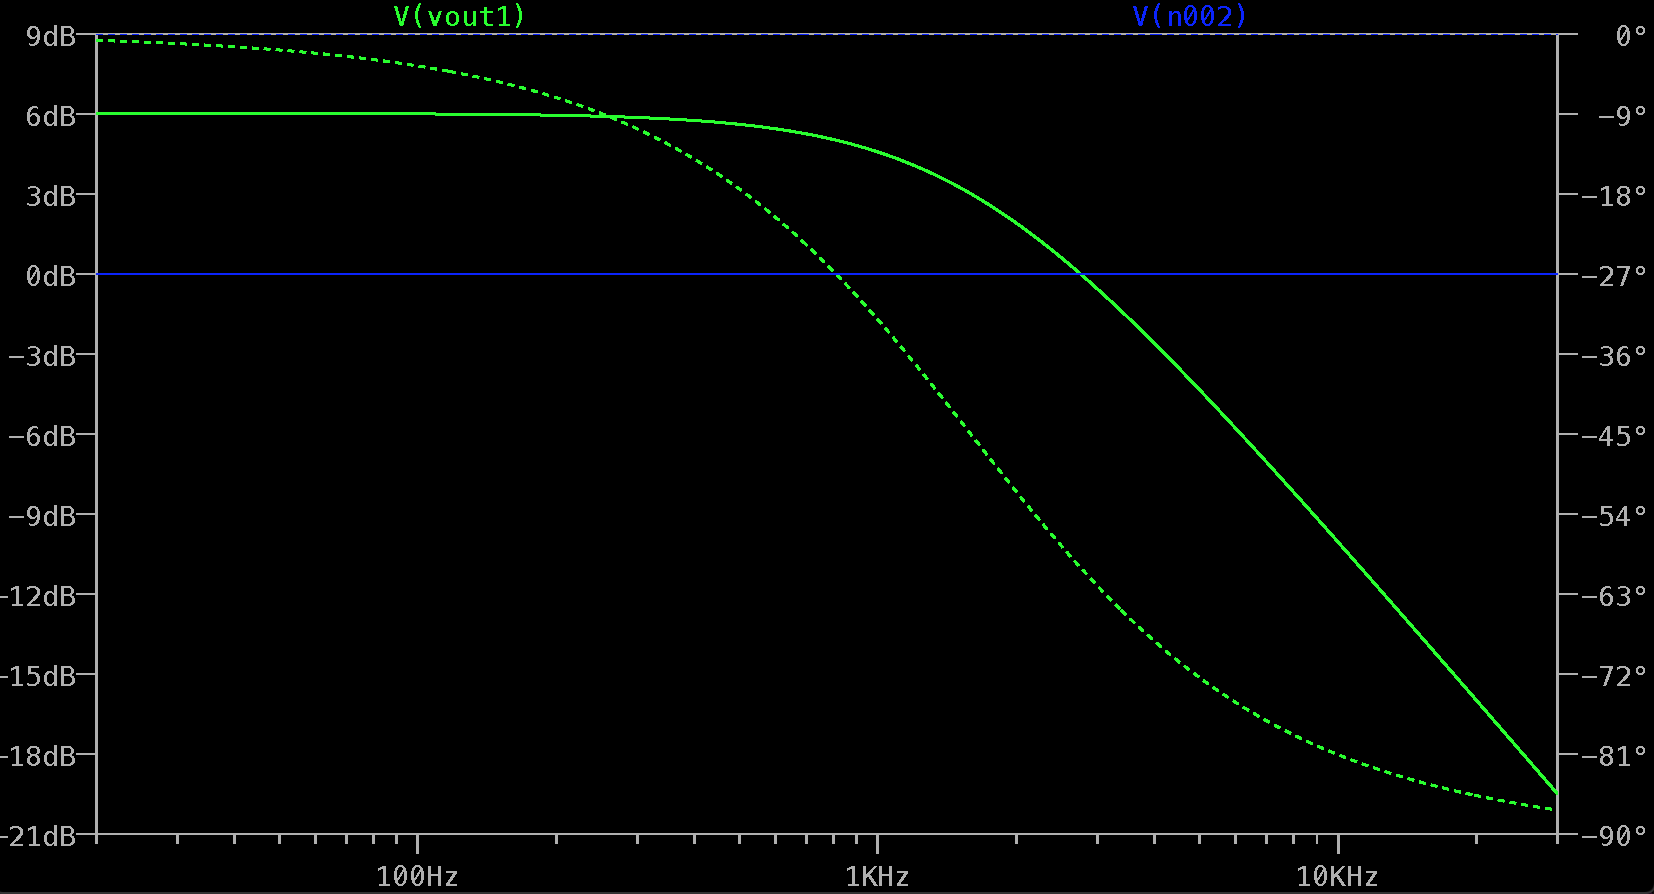

## **Description of practical usage of circuit.**

Some applications where Low Pass Filters are commonly used :

* Audio processing: To remove high frequency noise from audio signals and to produce a smoother sound.

* Electronic circuits: To remove unwanted high frequency signals and to protect  sensitive components from high frequency transients.

* Wireless communications: To remove high frequency interference and to improve the signal-to-noise ratio.

An example of how to use the circuit is after the Clipping amplifier of a Distortion Effect. This is use to control how Sharp and bright the distortion will be. This logic is used in the Ibanez's TS808 where a similar LPF structure is used to control the brightness of the effect. 


[TS808 Tone Section](https://www.electrosmash.com/tube-screamer-analysis#low-pass)






